# Check predictions with a trained model

In [1]:
import sys
sys.path.insert(0, "../code")

Visualization

In [2]:
from pathlib import Path
from dataflow.vis import render_image, render_mask, render_datapoint, default_palette
from dataflow.io_utils import read_image

import matplotlib.pylab as plt
%matplotlib inline

preds_palette = (0, 0, 0, 255, 255, 0)


def display_preds(y_pred1, y_pred2, image):
    _im = render_image(image)
    _preds1 = render_mask(y_pred1, palette=preds_palette)    
    _preds2 = render_mask(y_pred2, palette=preds_palette)    
    
    plt.figure(figsize=(25, 7))
    plt.subplot(131)
    plt.imshow(_im)
    plt.subplot(132)
    plt.title("Predictions 1")
    plt.imshow(_preds1)
    plt.subplot(133)
    plt.title("Predictions 2")
    plt.imshow(_preds2)


In [6]:
!ls ../output/mlruns/2/96d2bb2fbf67486fb14e3714c32caa14/artifacts

s1a_38RNV_3b_ASC_20150114t145841_tiles	s1a_38SMB_3b_ASC_20150114_tiles
s1a_38RNV_3b_ASC_20150408t145842_tiles	s1a_38SMB_3b_ASC_20150502_tiles
s1a_38RNV_3b_ASC_20150713t145847_tiles	s1a_38SMB_3b_ASC_20151005_1_tiles
s1a_38RNV_3b_ASC_20151017t145850_tiles	s1a_38SMB_3b_ASC_20151005_tiles
s1a_38SLD_3b_ASC_20151127t150808_tiles	s1a_38SME_3b_ASC_20150315t145956_tiles
s1a_38SLD_3b_DES_20150120t030951_tiles	s1a_38SME_3b_ASC_20150619t150001_tiles
s1a_38SLD_3b_DES_20150414t030951_tiles	s1a_38SME_3b_ASC_20150911t150005_tiles
s1a_38SLD_3b_DES_20150719t030956_tiles	s1a_38SME_3b_ASC_20151216t150004_tiles


In [7]:
from pathlib import Path

# ensembling on test predictions
preds_path1 = Path("../output/mlruns/2/96d2bb2fbf67486fb14e3714c32caa14/artifacts/")
# best single model test predictions
preds_path2 = Path("../output/mlruns/2/d33943a940aa48ac82728ac100a8450f/artifacts/raw/")
img_path = Path("../input/test_tiles/images/")

In [8]:
def get_gt_file(pred_file, gt_path):
    fname = pred_file.name
    parent = pred_file.parent.name
    gt_file = gt_path / parent / fname

    if not gt_file.exists():
        gt_file = gt_path / (parent.replace("_3b_", "_vh_")) / fname

    assert gt_file.exists(), "File is not found {}".format(gt_file.as_posix())
    return gt_file

In [10]:
pred1_files = sorted(list(preds_path1.rglob("*.tif")))
pred2_files = sorted([f for f in preds_path2.rglob("*.tif") if "merged" not in f.name])
len(pred1_files), len(pred2_files)

(552, 552)

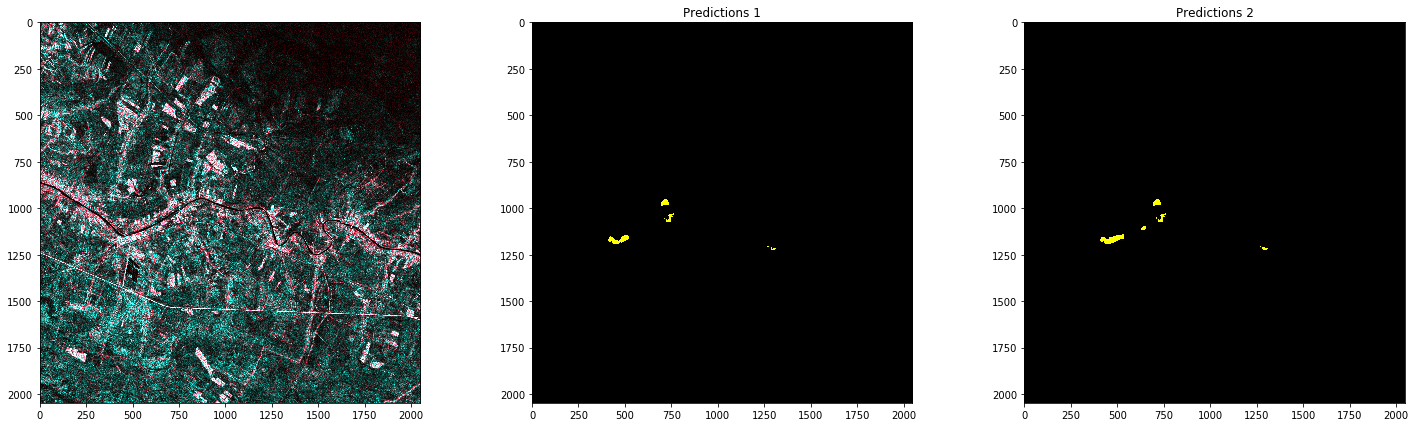

In [13]:
i = 135

p1_fp = pred1_files[i]
p2_fp = pred2_files[i]
img_fp = get_gt_file(p1_fp, img_path)

y_pred1 = read_image(p1_fp, dtype='uint8')
y_pred2 = read_image(p2_fp, dtype='uint8')
img = read_image(img_fp, dtype='float32')

display_preds(y_pred1, y_pred2, img)

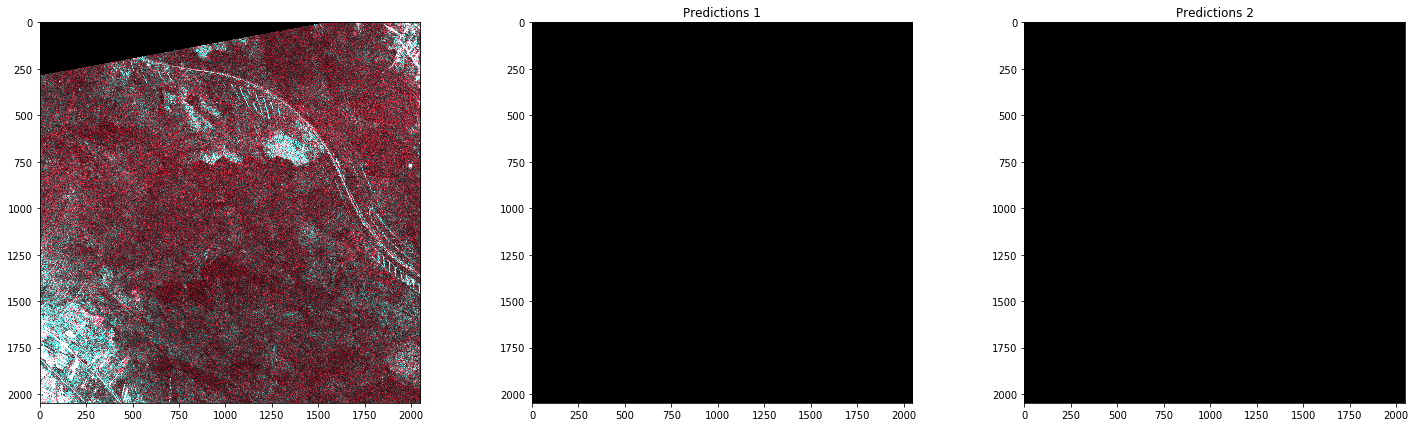

In [16]:
i = 134

p1_fp = pred1_files[i]
p2_fp = pred2_files[i]
img_fp = get_gt_file(p1_fp, img_path)

y_pred1 = read_image(p1_fp, dtype='uint8')
y_pred2 = read_image(p2_fp, dtype='uint8')
img = read_image(img_fp, dtype='float32')

display_preds(y_pred1, y_pred2, img)

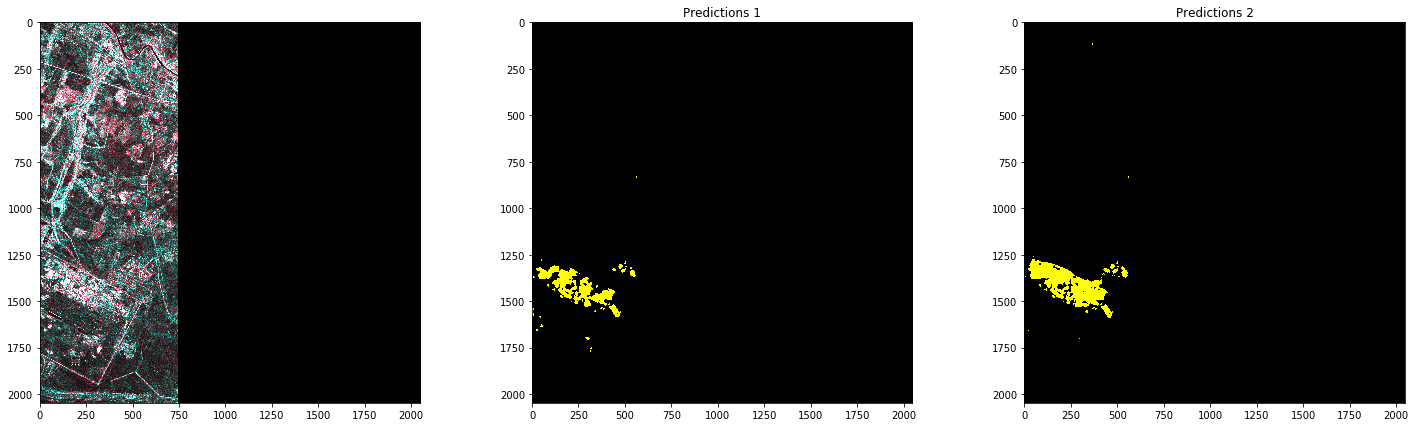

In [17]:
i = 46

p1_fp = pred1_files[i]
p2_fp = pred2_files[i]
img_fp = get_gt_file(p1_fp, img_path)

y_pred1 = read_image(p1_fp, dtype='uint8')
y_pred2 = read_image(p2_fp, dtype='uint8')
img = read_image(img_fp, dtype='float32')

display_preds(y_pred1, y_pred2, img)